<a href="https://colab.research.google.com/github/rocio-perez-sbarato/LLMs-for-poets/blob/main/Notebook_2_Datasets_y_Tokenizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

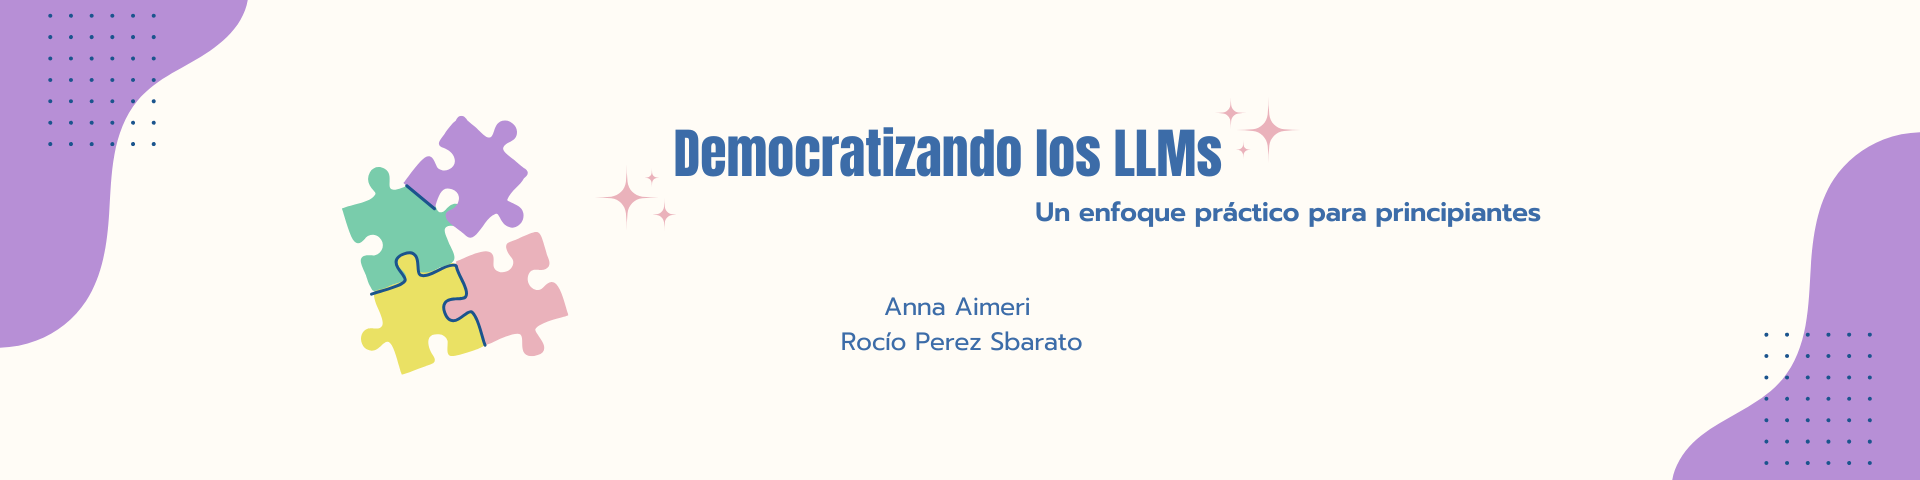

# Democratizando los LLMs: Un enfoque práctico para principiantes

**Índice**
- [Notebook 1 - Hugging Face y Librerías](https://colab.research.google.com/drive/1RNFURpgz-V3xnW2w30OWmCPyCZ3dSxOx#scrollTo=gdR-BQfAm4lc)
- 👉 [Notebook 2 - Datasets y Tokenización](https://colab.research.google.com/drive/1ln7sKvzybrjaknbzFvGN3kmjV314lrsB?usp=sharing#scrollTo=rKBG_lAukjVG)
- [Notebook 3 - Entrenamiento y Prueba del Modelo Nuevo](https://colab.research.google.com/drive/1YZ88QuSdo16o5SAiL4bE-bFy7FymnUd2#scrollTo=VY5M997phUr_)



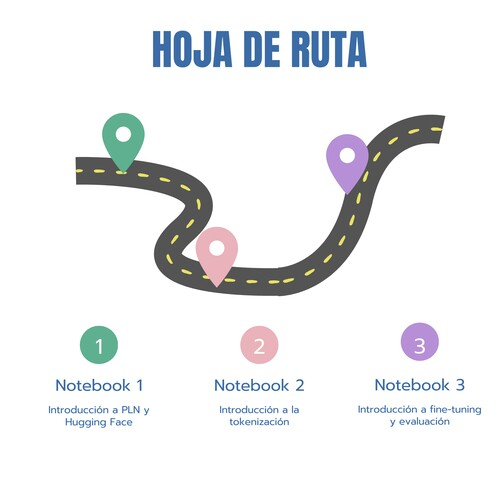

**Requerimientos deseables para entender este taller**
* Conocimiento básico de Python

**Público objetivo**
- Estos notebooks están dirigidos a investigadores, estudiantes de grado y desarrolladores interesados en resolver tareas con Modelos de Lenguaje a Gran Escala (LLMs)

**Librerías principales utilizadas**
* [Transformers](https://huggingface.co/docs/transformers/index) de [Hugging Face 🤗](https://huggingface.co)

**Sobre el proyecto** 🌟

Este proyecto tiene como objetivo **democratizar el acceso** a los Modelos de Lenguaje a Gran Escala (LLMs) mediante la creación de recursos prácticos y accesibles para principiantes. Queremos facilitar que cualquier persona, independientemente de su nivel técnico, pueda experimentar con LLMs y aplicarlos a sus propios problemas.

- [+ info sobre el proyecto](https://github.com/rocio-perez-sbarato/LLMs-for-poets)

---
---

# 🗂️ Contenidos

> *¿Cómo preparar tus propios datos para usar en modelos de lenguaje?* 🤔

## ¿Qué van a aprender? 💡

En este notebook abordaremos los siguientes temas:

**📊 Parte 1. Carga de Datasets**
- **Carga y exploración de datasets** utilizando la librería `datasets`
- **Procesamiento de datos** para que estén listos para nuestros modelos

**🧩 Parte 2. Introducción a la Tokenización**
- **Introducción a la tokenización**, un concepto clave en el procesamiento del lenguaje natural

**🥊 Parte 3. Tokenización y Embeddings en Acción**
- Exploraremos los **tokenizadores** de diferentes modelos y analizaremos cómo funcionan en la práctica.
- Veremos algunos modelos en acción, diferenciando entre aquellos basados en **decoders y encoders**. En el caso de los encoders, nos enfocaremos en la visualización de sus embeddings.

## ¿Qué habilidades se llevarán? 💪

Al finalizar este notebook, tendrás una comprensión sólida sobre cómo trabajar con datasets. Aprenderás a limpiarlos y prepararlos de manera efectiva, y entenderás los conceptos fundamentales de la tokenización y embeddings.

---
---

# Configuración del notebook

In [ ]:
%%capture
!pip install transformers>=4.41.2 sentence-transformers>=3.0.1 gensim>=4.3.2 scikit-learn>=1.5.0 accelerate>=0.31.0

In [ ]:
# Instalación de librerías
!pip install -U transformers[torch] --quiet
!pip install -U tabulate --quiet
!pip install -U datasets --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


### Carga de datasets

**Github**

- El repositorio LLMs-for-poets se clona nuevamente en el directorio raíz especificado. Dentro del repositorio descargado, se espera encontrar un subdirectorio llamado datasets que será utilizado posteriormente.

In [ ]:
# Descarga de datasets
import os

ROOT_PATH = "llm_adaptation_workshop"
DATASETS_PATH = os.path.join(ROOT_PATH, "datasets")

%rm -r "$ROOT_PATH"
!git clone https://github.com/rocio-perez-sbarato/LLMs-for-poets.git "$ROOT_PATH"

Cloning into 'llm_adaptation_workshop'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 62 (delta 19), reused 36 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (62/62), 21.46 MiB | 17.79 MiB/s, done.
Resolving deltas: 100% (19/19), done.


**Google Drive**

- Si no estás familiarizado con Github, hay otras formas de cargar tus datos en tu entorno de trabajo. Una de ellas es mediante Google Drive.
- Este código sirve para una carpeta que vos tengas en tu propio drive. La idea es que les quede por si lo necesitan usar. Esto es solo un ejemplo, no lo vamos a usar en el taller.
- El dataset es leído por a librería de Python llamada `pandas` y se guarda en una variable, en este caso `df`.



```
from google.colab import drive
import os
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta específica del archivo
DRIVE_FOLDER_PATH = "/content/drive/My Drive/democratizando_llms/datasets"
dataset_name = "wines_es.csv"  # Nombre del archivo que deseas cargar
dataset_path = os.path.join(DRIVE_FOLDER_PATH, dataset_name)

# Verificar si el archivo existe
if os.path.exists(dataset_path):
    print(f"Cargando {dataset_name} desde {dataset_path}...")
    try:
        # Cargar el archivo con pandas
        df = pd.read_csv(dataset_path)
        print("Archivo cargado exitosamente.\n Primeras filas:")
        print(df.head())
    except Exception as e:
        print(f"Error al cargar el archivo: {e}")
else:
    print(f"El archivo {dataset_name} no existe en la ruta especificada.")
```



# 📊 Parte 1. Carga de Datasets

La carga y preparación adecuada de los datos es un paso crucial en cualquier proyecto de aprendizaje automático. En este proceso, es fundamental comprender la importancia de dividir los datos correctamente.



## División de datos: Entrenamiento y Prueba

Típicamente, dividimos nuestros datos en dos conjuntos principales:

1. **Datos de entrenamiento**: Generalmente el 80% de los datos. Se utilizan para entrenar el modelo.
2. **Datos de prueba**: El 20% restante. Se usan para evaluar el rendimiento del modelo entrenado.

Esta división es crucial por varias razones:

- **Evaluación imparcial**: Nos permite evaluar el rendimiento del modelo en datos que no ha visto durante el entrenamiento, proporcionando una estimación más realista de cómo se comportará el modelo con nuevos datos.
- **Prevención del sobreajuste**: Ayuda a detectar si el modelo se está "memorizando" los datos de entrenamiento en lugar de aprender patrones generalizables.
- **Validación del modelo**: Nos permite confirmar si el modelo es capaz de generalizar a partir de los datos de entrenamiento.



## Implementación de la división de datos

En nuestro caso, utilizamos la función `train_test_split()` de la librería datasets para realizar esta división:

In [ ]:
import os
import torch
from datasets import load_dataset, Dataset
from tabulate import tabulate  # Importamos tabulate

# Fijamos semilla para reproducibilidad de resultados
torch.manual_seed(42)

# Recolección de parámetros de formulario
dataset_name = "Julio Cortazar (es)" # @param ["Resenas de Vinos (es)", "Martin Fierro (es)", "Peppa Pig (es)", "Julio Cortazar (es)", "Edgar Allan Poe (es)", "Jose Saramago (es)"]
max_samples = 30000 # @param {type:"number"}
name_to_file = {
    'Resenas de Vinos (es)'     : "wines_es.csv",
    'Martin Fierro (es)'        : "martin_fierro_v2.csv",
    'Peppa Pig (es)'            : "peppa_pig.csv",
    'Julio Cortazar (es)'       : "cortazar.csv",
    'Edgar Allan Poe (es)'      : "poe.csv",
    'Jose Saramago (es)'        : "saramago.csv",
}

# Carga de conjunto de datos
gpt2_ds = load_dataset(
    path=DATASETS_PATH,
    data_files={'all_data': name_to_file[dataset_name]},
)

# División de conjunto de datos en subconjuntos de entrenamiento y testeo
total_size = min(max_samples, len(gpt2_ds['all_data']))
val_size = int(total_size *.2)
train_size = total_size - val_size

gpt2_ds = gpt2_ds["all_data"].train_test_split(
    train_size=train_size,
    test_size=val_size,
    seed=42
)

# Resumen de la cantidad de datos
data_summary = [
    ['Entrenamiento', len(gpt2_ds['train'])],
    ['Evaluación', len(gpt2_ds['test'])]
]

# Mostrar resumen de los datos en formato tabla
print(f"* Información del dataset '{dataset_name}':\n---")
print(tabulate(data_summary, headers=['Conjunto', 'Cantidad de datos'], tablefmt='grid'))

Generating all_data split: 0 examples [00:00, ? examples/s]

* Información del dataset 'Julio Cortazar (es)':
---
+---------------+---------------------+
| Conjunto      |   Cantidad de datos |
+===============+=====================+
| Entrenamiento |               11321 |
+---------------+---------------------+
| Evaluación    |                2830 |
+---------------+---------------------+


In [ ]:
# Visualización de primeros 5 ejemplos del dataset para entrenar el modelo
for sample in gpt2_ds['train']['samples'][:5]:
    print(f">> {sample}")

>> Pobre trompa, se creía que no me daba cuenta.
>> —Un hotel —repitió Berthe Trépat—. ¿Pero ustedes escuchan esto, lo que acaba de proponerme?
>> Como es natural mañana escribiré para Jazz Hot una crónica del concierto de esta noche.
>> Y le importaba por él, naturalmente, por el efecto que le haría la forma en que a Laura iba a importarle la carta de mamá.
>> Armand Salacrou: popular dramaturgo francés que ha triunfado tanto en lo cómico como en lo dramático. Obras: La desconocida de Arras , La tierra es redonda , Historia de risa. <<


# 🧩 Parte 2. Introducción a la Tokenización





## Tokenización: El primer paso

Los modelos de lenguaje generativos (LLMs) toman un prompt de entrada y generan una respuesta. Sin embargo, antes de que el prompt llegue al modelo, debe pasar por un proceso crucial: la tokenización.

La tokenización es el proceso de dividir el texto en piezas más pequeñas llamadas "tokens". Este paso es fundamental por varias razones:

1. **Estandarización de la entrada**: Convierte el texto en un formato que el modelo puede procesar.
2. **Manejo de vocabulario**: Ayuda a manejar palabras desconocidas y reduce el tamaño del vocabulario del modelo.
3. **Captura de subpalabras**: Permite al modelo entender partes de palabras, lo que es útil para idiomas con muchas palabras compuestas o para manejar errores ortográficos.

Las entradas a las que responden los LLM son una serie de números enteros como se muestra en la figura. Cada uno es el identificador único de un token específico (carácter, palabra o parte de una palabra). Estos identificadores hacen referencia a una tabla dentro del tokenizador
que contiene todos los tokens que conoce.



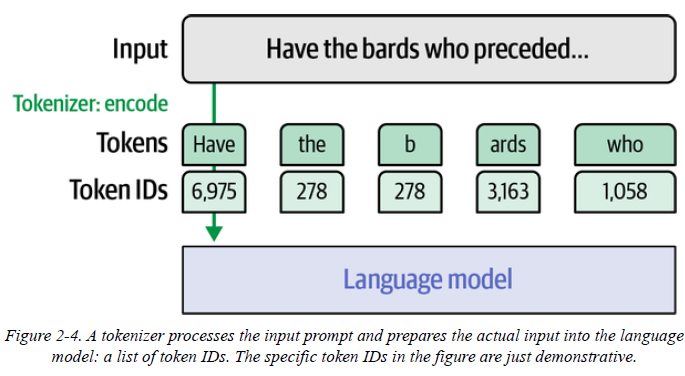



Además de utilizarse para procesar el texto de entrada en un modelo de lenguaje,
los tokenizadores se utilizan en la salida del modelo de lenguaje para convertir el token id resultante en la palabra de salida o token asociado con él, como muestra la figura.

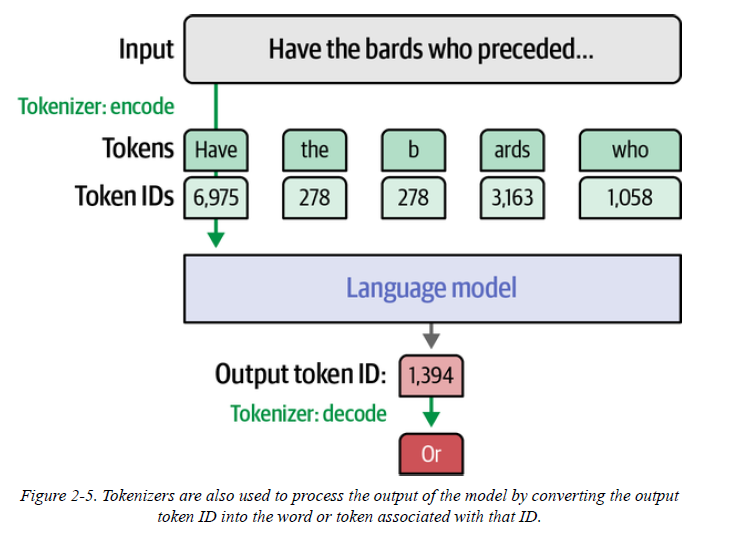

La ​​siguiente pieza del rompecabezas es encontrar la mejor representación numérica para estos tokens que el modelo pueda usar para calcular y modelar adecuadamente los patrones en el texto. Estos patrones se nos revelan como la coherencia de un modelo en un idioma específico, o la capacidad de codificar, o cualquiera de la creciente lista de capacidades que esperamos de los modelos de lenguaje.

## Token Embeddings

Técnicamente, el cambio de token ids a embeddings sin procesar es el primer paso que ocurre dentro de un modelo de lenguaje.





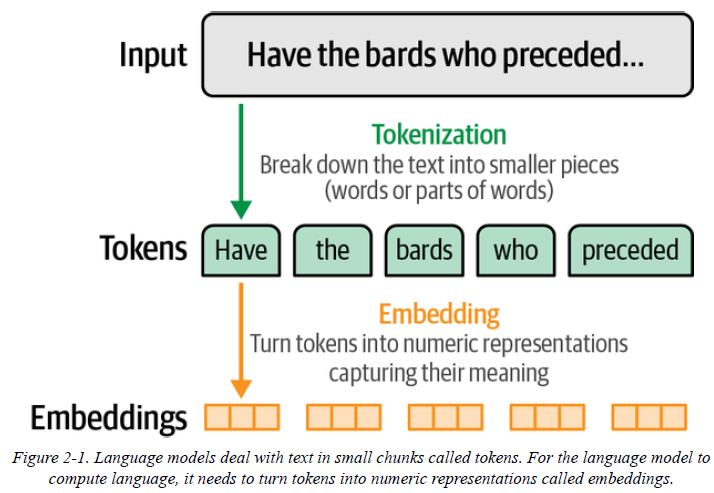

Los modelos de lenguaje pueden crear mejores embeddings de los outputs tokens ids. Esta es una de las principales formas de usar modelos de lenguaje para la
representación de texto. Estos contextual embeddings representan una palabra con un token diferente según su contexto. Estos vectores pueden luego ser utilizados por otros sistemas para una variedad de tareas.

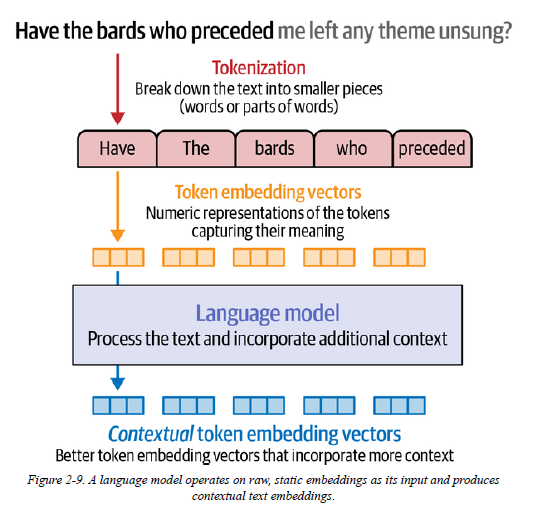

## Tokenizadores integrados

En el momento de diseñar el modelo, el creador del modelo elige un método de tokenización.
- Los métodos populares incluyen la codificación de pares de bytes (BPE) (ampliamente utilizada por los modelos GPT) y WordPiece (utilizado por BERT).
- Estos métodos son similares en el sentido de que apuntan a optimizar un conjunto eficiente de tokens para representar un conjunto de
datos de texto, pero llegan a ello de diferentes maneras.

Después de elegir el método, debemos tomar una serie de decisiones de diseño del tokenizador, como el tamaño del vocabulario y qué tokens especiales utilizar.

El tokenizador debe entrenarse en un conjunto de datos específico para establecer el mejor vocabulario que puede usar para representar ese conjunto de datos.

- Incluso si establecemos los mismos métodos y parámetros, un tokenizador entrenado en un conjunto de datos de texto en inglés será diferente de otro entrenado en un conjunto de datos de código o en un conjunto de datos de texto multilingüe.

Cada modelo de lenguaje viene con su propio tokenizador integrado. Esto es importante porque:

- El tokenizador se entrena junto con el modelo, por lo que está optimizado para el vocabulario y las características específicas que el modelo ha aprendido.
- Un modelo preentrenado está vinculado a su tokenizador y no puede usar un tokenizador diferente sin reentrenamiento.

## Uso de tokenizadores en la práctica

En la biblioteca Transformers de Hugging Face, podemos usar las clases `AutoTokenizer` y `AutoModelForCausalLM` para cargar fácilmente el tokenizador correcto para un modelo dado:

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

BASE_MODEL = "DeepESP/gpt2-spanish"
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
model = AutoModelForCausalLM.from_pretrained(BASE_MODEL)

## 🔄 Padding en Transformers y PLN

### ¿Qué es el Padding?
El padding es una técnica esencial en el procesamiento de lenguaje natural que se utiliza para manejar secuencias de texto de diferentes longitudes. En modelos como GPT-2, necesitamos que todas las secuencias en un batch tengan la misma longitud para poder procesarlas eficientemente.
¿Por qué es necesario?

* Los modelos de transformers requieren entradas de tamaño uniforme
* Permite procesar múltiples secuencias en paralelo (batching)
* Optimiza el uso de memoria y computación

### Componentes clave del Padding

* Input IDs: Los tokens convertidos a números
* Attention Mask: Máscara binaria (1s y 0s) que indica:
  * 1: Token real
  * 0: Token de padding

In [ ]:
from transformers import AutoTokenizer
import torch
import pandas as pd

# Usar el mismo tokenizer que ya teníamos
tokenizer = AutoTokenizer.from_pretrained("DeepESP/gpt2-spanish")

# 1. Ejemplo con frases de diferentes longitudes
frases = [
    "Me gusta el NLP",
    "Estoy aprendiendo sobre el procesamiento del lenguaje natural con transformers",
    "Python es genial"
]

# 2. Tokenización sin padding
tokens_sin_padding = [tokenizer.encode(frase) for frase in frases]
print("📏 Longitudes originales:")
for i, t in enumerate(tokens_sin_padding):
    print(f"Frase {i+1}: {len(t)} tokens")

# 3. Tokenización con padding automático
tokens_con_padding = tokenizer(
    frases,
    padding=True,  # Activar padding
    truncation=True,  # Activar truncamiento si es necesario
    max_length=20,   # Longitud máxima
    return_tensors='pt'  # Devolver tensores de PyTorch
)

# 4. Visualización detallada
print("\n🔍 Análisis detallado del padding:")
for i, frase in enumerate(frases):
    print(f"\nFrase original {i+1}: {frase}")
    print(f"Tokens sin padding: {tokens_sin_padding[i]}")
    print(f"Tokens con padding: {tokens_con_padding['input_ids'][i].tolist()}")
    print(f"Máscara de atención: {tokens_con_padding['attention_mask'][i].tolist()}")

    # Decodificar los tokens para ver las palabras
    tokens_decoded = tokenizer.convert_ids_to_tokens(tokens_con_padding['input_ids'][i])
    print(f"Tokens decodificados: {tokens_decoded}")

# 5. Crear una función de ayuda para visualizar el padding
def visualizar_padding(tokens_dict):
    # Convertir los tensores a listas para mejor visualización
    input_ids = tokens_dict['input_ids'].tolist()
    attention_mask = tokens_dict['attention_mask'].tolist()

    # Crear un DataFrame para visualización
    df = pd.DataFrame({
        'Position': range(len(input_ids[0])),
        'Token_ID': input_ids[0],
        'Token': tokenizer.convert_ids_to_tokens(input_ids[0]),
        'Is_Padding': ['Padding' if m == 0 else 'Token' for m in attention_mask[0]]
    })

    return df

# Visualizar el padding de la primera frase
print("\n📊 Visualización detallada del padding para la primera frase:")
print(visualizar_padding(tokens_con_padding))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/840k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/499k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

📏 Longitudes originales:
Frase 1: 5 tokens
Frase 2: 17 tokens
Frase 3: 4 tokens

🔍 Análisis detallado del padding:

Frase original 1: Me gusta el NLP
Tokens sin padding: [1633, 4605, 297, 411, 17924]
Tokens con padding: [1633, 4605, 297, 411, 17924, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]
Máscara de atención: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokens decodificados: ['Me', 'Ġgusta', 'Ġel', 'ĠN', 'LP', '<|endoftext|>', '<|endoftext|>', '<|endoftext|>', '<|endoftext|>', '<|endoftext|>', '<|endoftext|>', '<|endoftext|>', '<|endoftext|>', '<|endoftext|>', '<|endoftext|>', '<|endoftext|>', '<|endoftext|>']

Frase original 2: Estoy aprendiendo sobre el procesamiento del lenguaje natural con transformers y deep learning
Tokens sin padding: [7284, 30993, 596, 297, 24353, 337, 6718, 2145, 307, 17157, 21231, 324, 268, 1250, 426, 274, 11710]
Tokens con padding: [7284, 30993, 596, 297, 24353, 337, 6718, 2145, 307, 17157, 21231, 324, 268, 

# 🥊 Parte 3. Tokenización y Embeddings en Acción

## Veamos los tokenizadores de algunos modelos

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Lista de colores en formato RGB (como cadenas) para usar en la visualización de tokens
colors_list = [
    '102;194;165', '252;141;98', '141;160;203',
    '231;138;195', '166;216;84', '255;217;47'
]

def show_tokens(sentence, tokenizer_name):
    # Inicializa el tokenizer a partir del nombre del modelo proporcionado
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

    # Tokeniza la oración de entrada y obtiene los IDs de los tokens
    token_ids = tokenizer(sentence).input_ids

    # Itera sobre los IDs de los tokens y sus índices
    for idx, t in enumerate(token_ids):
        # Imprime cada token con un color de fondo correspondiente de la lista de colores
        print(
            f'\x1b[0;30;48;2;{colors_list[idx % len(colors_list)]}m' +  # Establece el color de fondo
            tokenizer.decode(t) +  # Decodifica el ID del token a su representación de texto
            '\x1b[0m',  # Resetea el formato del texto a su estado original
            end=' '  # Impide un salto de línea, de modo que los tokens se impriman en la misma línea
        )

In [ ]:
text_spanish = """
Miremos algunos TOKENS
para un cierto modelo de lenguaje 😊
abcABC (2+3)/4 = 1.25
"""

In [ ]:
show_tokens(text_spanish, "DeepESP/gpt2-spanish")


 M iremos  algunos  TO K EN S 
 para  un  cierto  modelo  de  lenguaje   � � � � 
 ab c ABC  ( 2 + 3 ) / 4  =  1 . 25 
 

> Si una palabra no está en el vocabulario del modelo, entonces se parte en pedacitos.

In [ ]:
show_tokens(text_spanish, "dccuchile/bert-base-spanish-wwm-uncased")

tokenizer_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/486k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

[CLS] mire ##mos algunos tok ##ens para un cierto modelo de lenguaje [UNK] abc ##ab ##c ( 2 + 3 ) / 4 = 1 . 25 [SEP] 

In [ ]:
text_english = """
English and CAPITALIZATION 😊
Hi, how are you?
abcABC (2+3)/4 = 1.25
"""

In [ ]:
show_tokens(text_english, "bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

[CLS] english and capital ##ization [UNK] hi , how are you ? abc ##ab ##c ( 2 + 3 ) / 4 = 1 . 25 [SEP] 

In [ ]:
show_tokens(text_english, "microsoft/Phi-3-mini-4k-instruct")

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

 
 English and C AP IT AL IZ ATION  � � � � 
 Hi , how are you ? 
 abc ABC ( 2 + 3 )/ 4 =  1 . 2 5 
 

In [ ]:
show_tokens(text_english, "google/flan-t5-small")

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

English and CA PI TAL IZ ATION  <unk> Hi , how are you ? ab c AB C (2 + 3) /4 = 1. 25  </s> 

## Ejemplos de Tokenizadores en Tipos de Modelos en Arquitectura Transformer

Como vimos en Notebook anterior, el Transformer es una arquitectura de red neuronal. Existen diferentes variantes de Transformers que se adaptan a distintas tareas en NLP, según el componente de la arquitectura que utilizan: Encoder-Decoder, Encoder-only  y Decoder-only.

---

🔍 **Recomendación de Recursos Visuales** 🌟

- [Ejemplos de Modelos de PLN](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Fcce3c437-4b9c-4d15-947d-7c177c9518e5_4258x5745.png)

- Para una explicación más completa, revisen los posts de la serie "The Illustrated..." de [Jay Alammar](http://jalammar.github.io/):
  - [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
  - [The Illustrated BERT](http://jalammar.github.io/illustrated-bert/)
  - [The Illustrated GPT-2](http://jalammar.github.io/illustrated-gpt2/) / [How GPT-3 Works](http://jalammar.github.io/how-gpt3-works-visualizations-animations/)

---

### **Modelos Encoder🤝Decoder**
Estos modelos combinan tanto un **encoder** como un **decoder**. El encoder **entiende** la entrada y el decoder **genera** la salida, basándose en esa comprensión. Son especialmente útiles en tareas donde se necesita transformar una secuencia de entrada en una secuencia de salida que sea coherente, como:

- **Traducción automática**.
- **Resúmenes** de textos largos.

Ejemplo: **Traducción de textos** 🌍 es un clásico caso donde los modelos encoder-decoder brillan, como en Google Translate.

### 🧠 **Modelos Encoder-only**

Estos modelos solo usan la parte del **encoder**, lo que significa que están diseñados para **entender** el texto. Su tarea principal es generar representaciones numéricas (*embeddings*) del texto de entrada que puedan ser usadas en tareas como:

- **Clasificación de textos** (por ejemplo, analizar si una reseña es positiva o negativa).
- **Reconocimiento de entidades** (como identificar nombres, fechas o lugares en un texto).

Ejemplo: **BERT** es un modelo encoder-only, conocido por su habilidad para entender el contexto de las palabras en tareas de análisis de texto.

In [ ]:
from transformers import AutoModel, AutoTokenizer
import torch

# Cargar un tokenizer
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

# Cargar un modelo de lenguaje
model = AutoModel.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

# Tokenizar la frase
input_text = "Me encanta aprender sobre el procesamiento del lenguaje natural porque"
tokens = tokenizer(input_text, return_tensors='pt')

# Mostrar el texto original y los IDs de los tokens
print(f"Texto de entrada: {input_text}")  # Mostrar el texto original
print(f"IDs de entrada (BERT): {tokens['input_ids']}")  # Mostrar los IDs de los tokens
print(f"Máscara de atención (BERT): {tokens['attention_mask']}")  # Mostrar la máscara de atención

# Mostrar los tokens correspondientes a los IDs
decoded_tokens = tokenizer.convert_ids_to_tokens(tokens['input_ids'][0])
print(f"Tokens generados por BERT: {decoded_tokens}")

# Pasar los tokens a través del modelo para obtener las representaciones
with torch.no_grad():  # Desactivar el cálculo de gradientes
    outputs = model(**tokens)

# outputs[0] contiene las representaciones del último layer
embeddings = outputs[0]  # Forma: (batch_size, sequence_length, hidden_size)
print(f"Representaciones (embeddings) generadas por BERT: {embeddings}")  # Mostrar las representaciones

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Texto de entrada: Me encanta aprender sobre el procesamiento del lenguaje natural porque
IDs de entrada (BERT): tensor([[    4,  1094,  5494,  5331,  1246,  1039, 14169,  1081,  8023,  2901,
          1552,     5]])
Máscara de atención (BERT): tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
Tokens generados por BERT: ['[CLS]', 'me', 'encanta', 'aprender', 'sobre', 'el', 'procesamiento', 'del', 'lenguaje', 'natural', 'porque', '[SEP]']
Representaciones (embeddings) generadas por BERT: tensor([[[-0.4870,  0.0676,  0.0888,  ..., -0.7751, -0.4587, -0.1905],
         [ 0.1874, -0.0347,  0.1331,  ...,  0.5573, -0.2495, -1.3183],
         [-0.1085,  0.1366,  0.9311,  ...,  0.6020, -0.2315, -1.0261],
         ...,
         [-0.2994,  0.2229, -0.4559,  ...,  0.0327, -0.7677, -0.7298],
         [-1.0415,  0.0244,  0.6090,  ..., -0.4320, -0.2025, -0.2985],
         [-0.6656, -0.0131, -0.0060,  ..., -0.1032, -0.1467, -1.0535]]])


### ✍️ **Modelos Decoder-only**
Estos modelos solo usan la parte del **decoder**, y su especialidad es **generar texto**. En lugar de comprender una entrada, su tarea es predecir la siguiente palabra en una secuencia, lo que los hace ideales para tareas generativas como:

- **Escritura automática** (crear historias o respuestas).
- **Preguntas y respuestas** (Q&A).

Ejemplo: **GPT** 🚀 (como GPT-2, GPT-3 y GPT-4) es un modelo decoder-only, utilizado para generar textos de todo tipo, desde resúmenes hasta respuestas a preguntas.



In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Fijamos semilla para reproducibilidad de resultados
torch.manual_seed(42)

# Inicializar el tokenizer y el modelo
tokenizer = AutoTokenizer.from_pretrained("DeepESP/gpt2-spanish")
model = AutoModelForCausalLM.from_pretrained("DeepESP/gpt2-spanish")

# Codificar el texto de entrada
input_text = "Me encanta aprender sobre el procesamiento del lenguaje natural porque"
token_ids = tokenizer(input_text, return_tensors='pt').input_ids

print(f"Texto de entrada: {input_text}")  # Mostrar el texto original
print(f"IDs de entrada: {token_ids}")     # Mostrar los IDs de los tokens

# Generar texto
# Usamos el modelo para predecir las siguientes palabras a partir del texto de entrada
generated_ids = model.generate(token_ids, do_sample=True,
                               max_length=50,
                               top_k=50,
                               top_p=0.95,
                               pad_token_id=tokenizer.eos_token_id)  # Especificar el token de relleno

# Decodificar el texto generado
output_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print(f"Texto de salida: {output_text}")  # Mostrar el texto generado

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Texto de entrada: Me encanta aprender sobre el procesamiento del lenguaje natural porque
IDs de entrada: tensor([[ 1633, 17022,  8421,   596,   297, 24353,   337,  6718,  2145,  1050]])
Texto de salida: Me encanta aprender sobre el procesamiento del lenguaje natural porque no entiendo la esencia del idioma natural. A pesar de todo esto he aprendido muchas cosas y la mayoría de las veces se me escapa algo a mí. 

—Pues el lenguaje natural es completamente diferente


# Referencias

- Jurafsky, D., & Martin, J. (2019). *Speech and Language Processing*. Capítulos 2, 3, 9 y 10. Disponible para descargar de manera gratuita en [Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/).
- Alammar, J., & Grootendorst, M. (2024). Hands-On Large Language Models. O'Reilly. Capítulo 2. Disponible en [Hands-On Large Language Models](https://www.oreilly.com/library/view/hands-on-large-language/9781098150952/).

# En el próximo notebook...



En nuestro siguiente notebook, "Entrenamiento y Prueba del Modelo Nuevo", daremos un paso más allá y nos sumergiremos en el proceso de adaptar (fine-tuning) un modelo pre-entrenado a nuestras necesidades específicas. Vamos a:

1. **Configurar un modelo para fine-tuning**: Aprenderemos cómo preparar un modelo pre-entrenado para ser adaptado a una tarea específica.

2. **Definir hiperparámetros de entrenamiento**: Exploraremos cómo seleccionar y ajustar los parámetros clave que influyen en el proceso de entrenamiento.

3. **Implementar el bucle de entrenamiento**: Utilizaremos la clase Trainer de Hugging Face para simplificar el proceso de entrenamiento.

4. **Monitorear el entrenamiento**: Aprenderemos a seguir métricas importantes como la pérdida (loss) y la perplejidad durante el entrenamiento.

5. **Evaluar el modelo**: Pondremos a prueba nuestro modelo adaptado en un conjunto de datos de prueba para medir su rendimiento.

6. **Generar texto con el modelo adaptado**: Veremos cómo usar nuestro modelo recién entrenado para generar texto.

7. **Comparar resultados**: Analizaremos las diferencias entre el modelo base y nuestro modelo adaptado.

8. **Guardar y cargar modelos personalizados**: Aprenderemos a guardar nuestro modelo adaptado para uso futuro y cómo cargarlo nuevamente.

Nos vemos en el [Notebook 3: Entrenamiento y Prueba del Modelo Nuevo](https://colab.research.google.com/drive/1YZ88QuSdo16o5SAiL4bE-bFy7FymnUd2#scrollTo=VY5M997phUr_).

# 📨 Formulario de feedback

In [ ]:
# @markdown ¡Ejecutá esta celda para enviarnos tu feedback!

from IPython.display import HTML
HTML(
    """
<iframe
  src="https://forms.gle/yuNXX9AdogCHQtrXA",
  width="80%"
  height="1200px" >
  Loading...
</iframe>
"""
)